In [23]:
import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate()

  Activating environment at `~/GitHub/Optimal-Control-16-745/lecture-notebooks/Lecture 3/Project.toml`


In [24]:
using LinearAlgebra
using ForwardDiff
using PyPlot

In [25]:
function f(x)
    return x.^4 + x.^3 - x.^2 - x
end

f (generic function with 1 method)

In [26]:
function ∇f(x)
    return 4.0*x.^3 + 3.0*x.^2 - 2.0*x - 1.0
end

∇f (generic function with 1 method)

In [27]:
function ∇2f(x)
    return 12.0*x.^2 + 6.0*x - 2.0
end

∇2f (generic function with 1 method)

In [28]:
x = LinRange(-1.75,1.25,1000)

1000-element LinRange{Float64}:
 -1.75,-1.747,-1.74399,-1.74099,-1.73799,…,1.23799,1.24099,1.24399,1.247,1.25

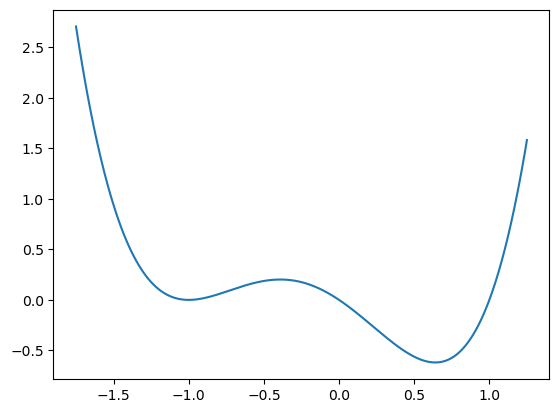

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x1d3b12080>

In [29]:
p = plot(x,f(x))

In [30]:
function newton_step(x0)
    xn = x0 - ∇2f(x0)\∇f(x0)
end

newton_step (generic function with 1 method)

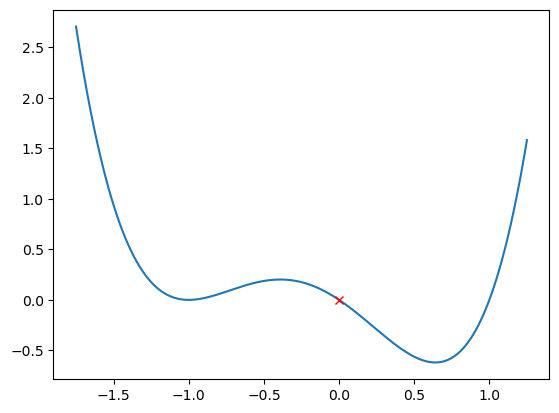

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x1d402cf70>

In [39]:
xguess = 0.0
plot(x, f(x))
plot(xguess, f(xguess), "rx")

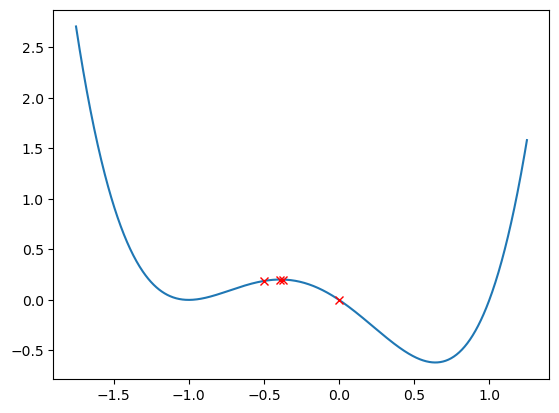

4-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x1d4181ba0>
 PyObject <matplotlib.lines.Line2D object at 0x1d4181c60>
 PyObject <matplotlib.lines.Line2D object at 0x1d4181d80>
 PyObject <matplotlib.lines.Line2D object at 0x1d4181ea0>

In [42]:
xnew = newton_step(xguess[end])
xguess = [xguess xnew]
plot(x, f(x))
plot(xguess, f(xguess), "rx")

In [43]:
∇2f(0.0)

-2.0

In [44]:
function regularized_newton_step(x0)
    β = 1.0
    H = ∇2f(x0)
    while !isposdef(H)
        H = H + β*I
    end
    xn = x0 - H\∇f(x0)
end

regularized_newton_step (generic function with 1 method)

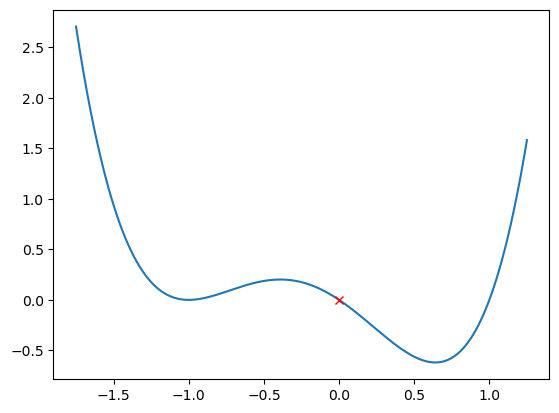

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x1d41fa620>

In [45]:
xguess = 0.0
plot(x, f(x))
plot(xguess, f(xguess), "rx")

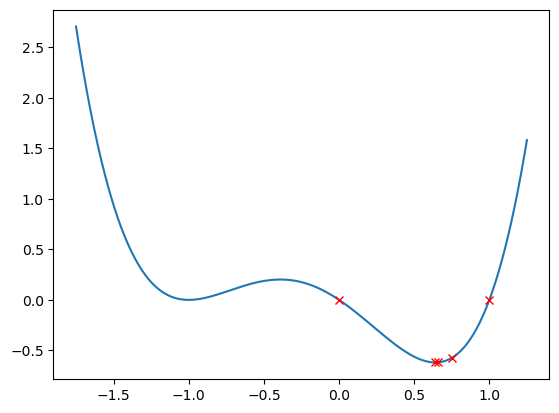

5-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x1d43b7cd0>
 PyObject <matplotlib.lines.Line2D object at 0x1d43b7d90>
 PyObject <matplotlib.lines.Line2D object at 0x1d43b7eb0>
 PyObject <matplotlib.lines.Line2D object at 0x1d43b7fd0>
 PyObject <matplotlib.lines.Line2D object at 0x1d43e4130>

In [49]:
xnew = regularized_newton_step(xguess[end])
xguess = [xguess xnew]
plot(x, f(x))
plot(xguess, f(xguess), "rx")